In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
x_scaled = np.load('/home/youmna/Heart-Disease-Prediction/data/X_scaled.npy')
y = np.load('/home/youmna/Heart-Disease-Prediction/data/y.npy')
feature_names = pd.read_csv('/home/youmna/Heart-Disease-Prediction/data/df_encoded.csv').drop('target', axis=1).columns

/tmp/ipykernel_4781/1433913411.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette=['#4a90e2'])
/tmp/ipykernel_4781/1433913411.py:13: UserWarning: 
The palette list has fewer values (1) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette=['#4a90e2'])


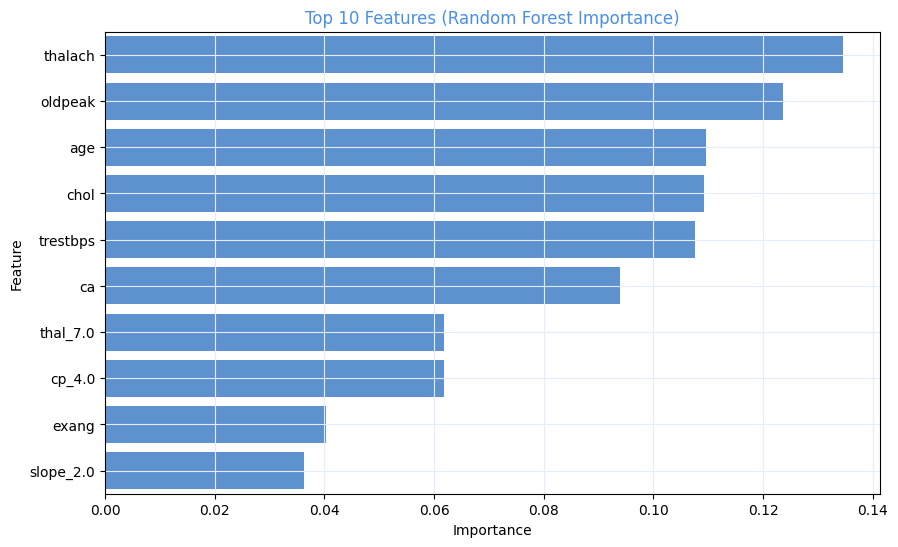

In [8]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

model=RandomForestClassifier()
model.fit(x_scaled,y)

importance= model.feature_importances_
importance_df = pd.DataFrame({'Feature': feature_names , 'Importance': importance})
importance_df= importance_df.sort_values(by='Importance' ,ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', palette=['#4a90e2'])
plt.title('Top 10 Features (Random Forest Importance)', color='#4a90e2')
plt.grid(True, color='#e5ecff')
plt.show()

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logistic_model= LogisticRegression(max_iter=1000)
rfe= RFE(logistic_model, n_features_to_select=10)
rfe.fit(x_scaled,y)

selected_features_rfe = feature_names[rfe.support_]
print("RFE selected:", list(selected_features_rfe))

RFE selected: ['sex', 'trestbps', 'fbs', 'thalach', 'oldpeak', 'ca', 'cp_2.0', 'cp_4.0', 'slope_2.0', 'thal_7.0']


In [12]:
from sklearn.feature_selection import SelectKBest, chi2


chi2_selector = SelectKBest(score_func=chi2, k=10)
X_chi2 = chi2_selector.fit_transform(abs(x_scaled), y)

selected_features_chi2 = feature_names[chi2_selector.get_support()]
print("Chi-Square selected:", list(selected_features_chi2))


Chi-Square selected: ['fbs', 'exang', 'oldpeak', 'ca', 'cp_2.0', 'cp_3.0', 'restecg_1.0', 'slope_3.0', 'thal_6.0', 'thal_7.0']


In [13]:

selected_set = set(selected_features_rfe) | set(selected_features_chi2) | set(importance_df.head(10)['Feature'])


df_encoded = pd.read_csv('/home/youmna/Heart-Disease-Prediction/data/df_encoded.csv')
X_reduced = df_encoded[list(selected_set)]
X_reduced['target'] = df_encoded['target']
X_reduced.to_csv('/home/youmna/Heart-Disease-Prediction/data/reduced_heart_disease.csv', index=False)

print("Reduced dataset saved with shape:", X_reduced.shape)


Reduced dataset saved with shape: (297, 18)


/tmp/ipykernel_4781/3333394556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_reduced['target'] = df_encoded['target']
